<a href="https://colab.research.google.com/github/HudaZainElAbden/Player-value-prediction-AND-Player-level-classification/blob/main/Player_Level_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%pip install --upgrade category_encoders
from category_encoders import TargetEncoder
from sklearn import preprocessing

Note: you may need to restart the kernel to use updated packages.


**Load player player_data set & print head**

In [ ]:
player_data=pd.read_csv("player-classification.csv")
player_data.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,PlayerLevel
0,210824,F. Tchenkoua,Fabien Tchenkoua,10/1/1992,26,172.72,73.9,"LM,RM",Cameroon,64,...,51+2,51+2,51+2,57+2,56+2,50+2,50+2,50+2,56+2,C
1,172835,M. Andreolli,Marco Andreolli,6/10/1986,32,187.96,79.8,CB,Italy,72,...,61+2,61+2,61+2,54+2,58+2,71+2,71+2,71+2,58+2,A
2,212223,S. Maguire,Sean Maguire,5/1/1994,24,175.26,68.0,"ST,LM",Republic of Ireland,71,...,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2,A
3,188168,G. Friend,George Friend,10/19/1987,31,187.96,83.0,"LB,LWB",England,72,...,68+2,68+2,68+2,70+2,70+2,70+2,70+2,70+2,70+2,A
4,226139,J. Tamimi,Jonathan Tamimi,10/12/1994,24,175.26,74.8,"RWB,RM",Jordan,64,...,58+2,58+2,58+2,62+2,61+2,58+2,58+2,58+2,61+2,C


**Display some info about player_data set**

In [ ]:
player_data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14363 entries, 0 to 14362
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             14363 non-null  int64  
 1   name                           14363 non-null  object 
 2   full_name                      14363 non-null  object 
 3   birth_date                     14363 non-null  object 
 4   age                            14363 non-null  int64  
 5   height_cm                      14363 non-null  float64
 6   weight_kgs                     14363 non-null  float64
 7   positions                      14363 non-null  object 
 8   nationality                    14363 non-null  object 
 9   overall_rating                 14363 non-null  int64  
 10  potential                      14363 non-null  int64  
 11  wage                           14172 non-null  float64
 12  preferred_foot                 14363 non-null 

In [ ]:
data=player_data.copy()
data.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,PlayerLevel
0,210824,F. Tchenkoua,Fabien Tchenkoua,10/1/1992,26,172.72,73.9,"LM,RM",Cameroon,64,...,51+2,51+2,51+2,57+2,56+2,50+2,50+2,50+2,56+2,C
1,172835,M. Andreolli,Marco Andreolli,6/10/1986,32,187.96,79.8,CB,Italy,72,...,61+2,61+2,61+2,54+2,58+2,71+2,71+2,71+2,58+2,A
2,212223,S. Maguire,Sean Maguire,5/1/1994,24,175.26,68.0,"ST,LM",Republic of Ireland,71,...,48+2,48+2,48+2,53+2,51+2,47+2,47+2,47+2,51+2,A
3,188168,G. Friend,George Friend,10/19/1987,31,187.96,83.0,"LB,LWB",England,72,...,68+2,68+2,68+2,70+2,70+2,70+2,70+2,70+2,70+2,A
4,226139,J. Tamimi,Jonathan Tamimi,10/12/1994,24,175.26,74.8,"RWB,RM",Jordan,64,...,58+2,58+2,58+2,62+2,61+2,58+2,58+2,58+2,61+2,C


In [ ]:
#preprocessing of traits column
player_data['traits'] = player_data['traits'].fillna("Technical Dribbler (CPU AI Only)")# fill nulls with mod

traits_text=""
for i in player_data['traits']:
    traits_text=traits_text+','
    traits_text=traits_text+str(i)

trait_list = traits_text.split(',')

unique_list = []
for x in trait_list:
    if x not in unique_list:
        unique_list.append(x)

print(len(unique_list))

37


**Check nulls**

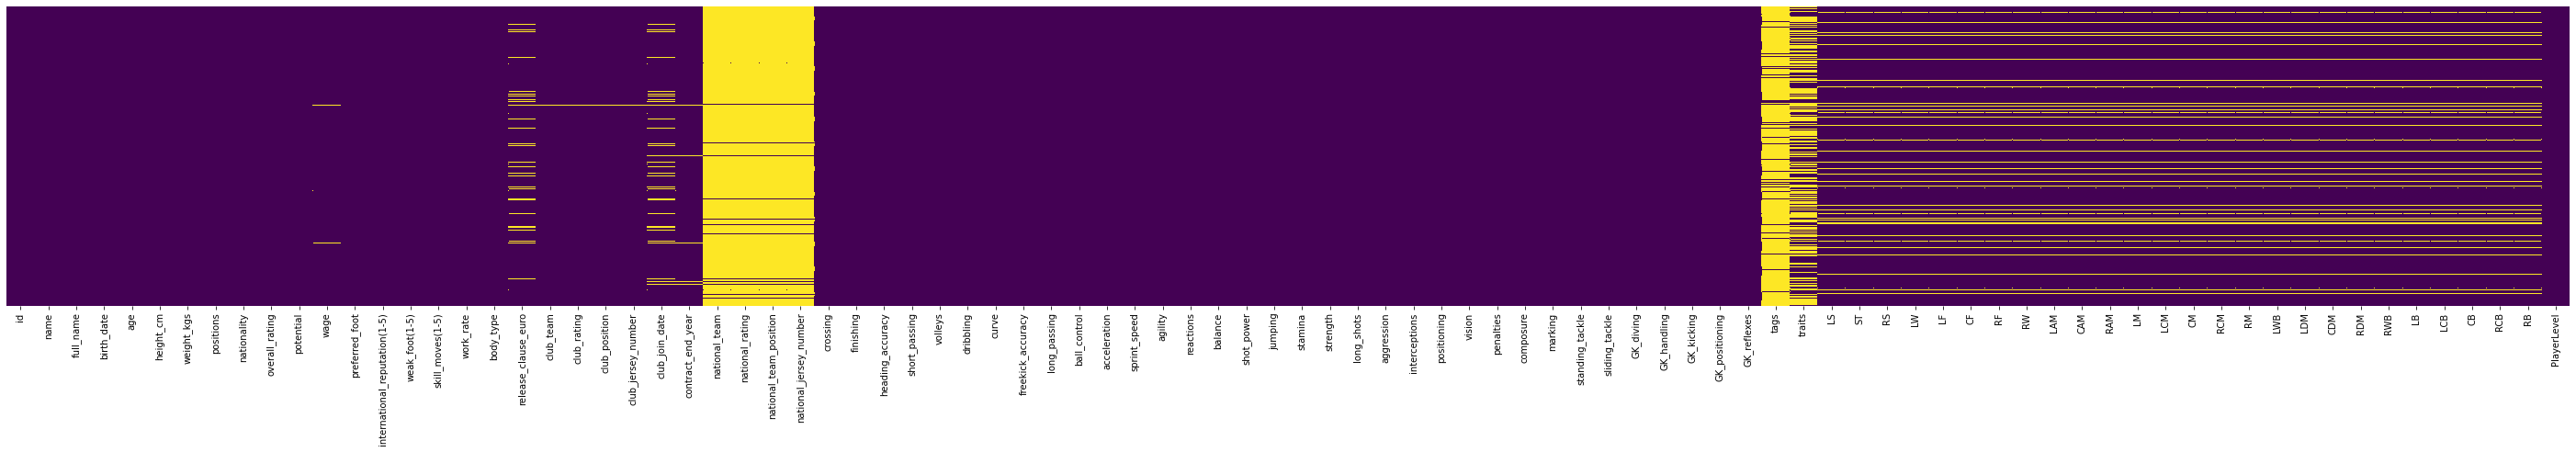

In [ ]:
f, ax = plt.subplots(figsize=(50, 6))
sns.heatmap(player_data.isnull(),yticklabels=False,cbar=False,cmap="viridis",ax=ax)

**Handle Nulls**

In [ ]:
#Drop columns
data.drop(['national_team','national_team_position','tags',
                  'club_team','club_position','traits','national_jersey_number','club_jersey_number'],axis=1, inplace=True)
#fill null with zero
data.fillna({'national_rating':0,'club_join_date':0,'contract_end_year':0},inplace=True) 
player_data.fillna({'national_rating':0,'club_join_date':0,'contract_end_year':0},inplace=True) 

#replace nulls with mode

data['wage'].fillna(player_data.wage.mode()[0],inplace=True)
data['release_clause_euro'].fillna(player_data.wage.mode()[0],inplace=True)#save

player_data['wage'].fillna(player_data.wage.mode()[0],inplace=True)
player_data['release_clause_euro'].fillna(player_data.wage.mode()[0],inplace=True)
#replace nulls with mean
data['club_rating'].fillna(int(data['club_rating'].mean()),inplace=True)#save
player_data['club_rating'].fillna(int(data['club_rating'].mean()),inplace=True)


replace nulls with mode per each category 

In [ ]:
#get mode of each category(A,B,C,D,S) per column
df=player_data.iloc[:,65:92]
ModePerCategory=df.groupby('PlayerLevel').agg(lambda x: x.value_counts().index[0])


In [ ]:
ModePerCategory#save excel file

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
PlayerLevel,,,,,,,,,,,,,,,,,,,,,
A,64+2,64+2,64+2,68+2,68+2,68+2,68+2,68+2,69+2,69+2,...,68+2,68+2,68+2,68+2,68+2,69+2,69+2,69+2,69+2,69+2
B,64+2,64+2,64+2,65+2,64+2,64+2,64+2,65+2,64+2,64+2,...,65+2,63+2,63+2,63+2,65+2,65+2,66+2,66+2,66+2,65+2
C,60+2,60+2,60+2,61+2,60+2,60+2,60+2,61+2,60+2,60+2,...,61+2,60+2,60+2,60+2,61+2,61+2,62+2,62+2,62+2,61+2
D,51+2,51+2,51+2,54+2,54+2,54+2,54+2,54+2,56+2,56+2,...,53+2,54+2,54+2,54+2,53+2,54+2,56+2,56+2,56+2,54+2
S,72+2,72+2,72+2,74+2,72+2,72+2,72+2,74+2,73+2,73+2,...,73+2,73+2,73+2,73+2,73+2,72+2,73+2,73+2,73+2,72+2


In [ ]:
def impute_missing_occ (row):
    index_no = ModePerCategory.columns.get_loc(column_name)
  
    if pd.isnull(row[column_name]) :
        if row[["PlayerLevel"]].values== 'A':
            return ModePerCategory.iloc[0,index_no]
        elif row[["PlayerLevel"]].values== "B":
            return ModePerCategory.iloc[1,index_no]  
        elif row[["PlayerLevel"]].values =="C":
            return ModePerCategory.iloc[2,index_no]  
        elif row[["PlayerLevel"]].values=="D":
            return ModePerCategory.iloc[3,index_no] 
        elif row[["PlayerLevel"]].values=="S":
            return ModePerCategory.iloc[4,index_no]    

    else:
        return row[[column_name]]

dd=df.drop(['PlayerLevel'],axis=1)

for i,column_name in enumerate(dd.columns):
    data[column_name]=data.apply(impute_missing_occ,axis=1)        

<AxesSubplot:>

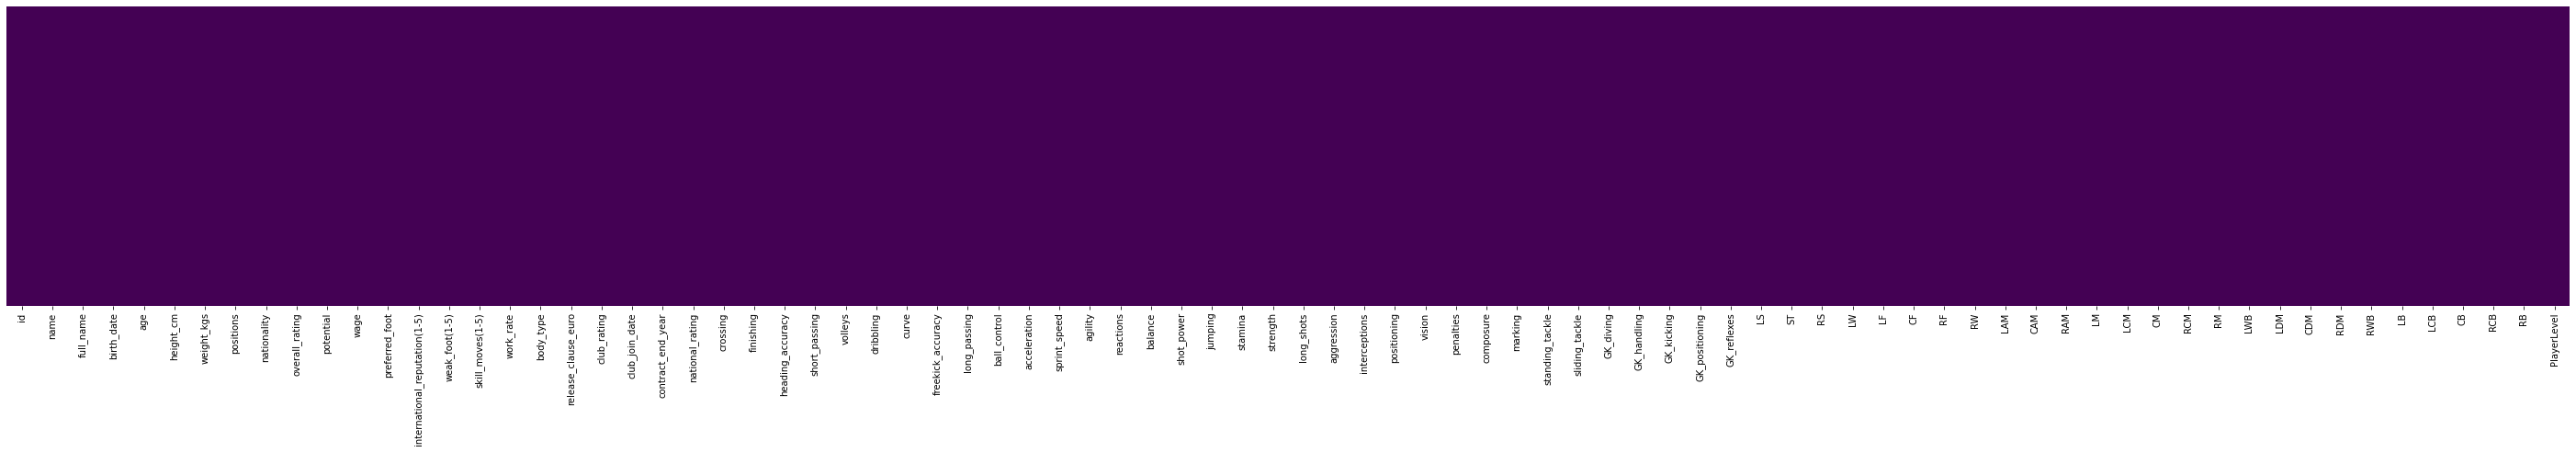

In [ ]:
f, ax = plt.subplots(figsize=(50, 6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis",ax=ax)

**Correlation**


1.   categorical with categorical
2.   numerical with categorical



In [ ]:
%pip install researchpy
import researchpy as rp

catCols = player_data.select_dtypes("object").columns
V=np.zeros([df.shape[1],df.shape[1]])
for i,column_name in enumerate(df.columns):
    v=[]
    for j,name in enumerate(df.columns): 
        ctab,chi_statistic,expected=rp.crosstab(player_data[name],player_data[column_name],margins=False,test='chi-square',expected_freqs=True)
        v.append(chi_statistic.iloc[2,1])
    V[i]=v 

categories_corr=pd.DataFrame(V,index=df.columns,columns=df.columns)   
categories_corr 

Note: you may need to restart the kernel to use updated packages.


,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,PlayerLevel
LS,1.0000,1.0000,1.0000,0.4722,0.5004,0.5004,0.5004,0.4722,0.4492,0.4492,...,0.3212,0.3212,0.3212,0.3092,0.3140,0.3371,0.3371,0.3371,0.3140,0.4472
ST,1.0000,1.0000,1.0000,0.4722,0.5004,0.5004,0.5004,0.4722,0.4492,0.4492,...,0.3212,0.3212,0.3212,0.3092,0.3140,0.3371,0.3371,0.3371,0.3140,0.4472
RS,1.0000,1.0000,1.0000,0.4722,0.5004,0.5004,0.5004,0.4722,0.4492,0.4492,...,0.3212,0.3212,0.3212,0.3092,0.3140,0.3371,0.3371,0.3371,0.3140,0.4472
LW,0.4722,0.4722,0.4722,1.0000,0.5777,0.5777,0.5777,1.0000,0.5501,0.5501,...,0.3148,0.3148,0.3148,0.3285,0.3264,0.3228,0.3228,0.3228,0.3264,0.5003
LF,0.5004,0.5004,0.5004,0.5777,1.0000,1.0000,1.0000,0.5777,0.5669,0.5669,...,0.3175,0.3175,0.3175,0.3181,0.3245,0.3308,0.3308,0.3308,0.3245,0.5154
CF,0.5004,0.5004,0.5004,0.5777,1.0000,1.0000,1.0000,0.5777,0.5669,0.5669,...,0.3175,0.3175,0.3175,0.3181,0.3245,0.3308,0.3308,0.3308,0.3245,0.5154
RF,0.5004,0.5004,0.5004,0.5777,1.0000,1.0000,1.0000,0.5777,0.5669,0.5669,...,0.3175,0.3175,0.3175,0.3181,0.3245,0.3308,0.3308,0.3308,0.3245,0.5154
RW,0.4722,0.4722,0.4722,1.0000,0.5777,0.5777,0.5777,1.0000,0.5501,0.5501,...,0.3148,0.3148,0.3148,0.3285,0.3264,0.3228,0.3228,0.3228,0.3264,0.5003
LAM,0.4492,0.4492,0.4492,0.5501,0.5669,0.5669,0.5669,0.5501,1.0000,1.0000,...,0.3154,0.3154,0.3154,0.3235,0.3239,0.3314,0.3314,0.3314,0.3239,0.5091
CAM,0.4492,0.4492,0.4492,0.5501,0.5669,0.5669,0.5669,0.5501,1.0000,1.0000,...,0.3154,0.3154,0.3154,0.3235,0.3239,0.3314,0.3314,0.3314,0.3239,0.5091


In [ ]:
for i,column_name in enumerate(player_data.columns):
    
    if i == 65:
        break
    if player_data.dtypes[column_name] == "object":
        continue
    CategoryGroupLists=player_data.groupby('PlayerLevel')[column_name].apply(list)
  # when P-Value > 0.05 that means columns are not correlated --> reject the column
    AnovaResults = f_oneway(*CategoryGroupLists)
    if AnovaResults[1] > 0.05:
        print(column_name, ' --> P-Value for Anova is: ', AnovaResults[1]) # --> columns to be dropped + (id)
        

corrr_categ_and_y = []

for i,column_name in enumerate(player_data.columns):
    if i == 65:
        break
    if player_data.dtypes[column_name] != "object":
        continue
    ctab,chi_statistic,expected=rp.crosstab(player_data[column_name],player_data["PlayerLevel"],margins=False,test='chi-square',expected_freqs=True)
    corrr_categ_and_y.append(chi_statistic.iloc[2,1]) 
    if corrr_categ_and_y[-1] < 0.1:
        print(column_name , "-->" , corrr_categ_and_y[-1]) # --> columns to be dropped +  (name & full name & nationality)        
        

preferred_foot --> 0.0639
body_type --> 0.0302


**Handling categories**

1.   work_rate,body_type ==> label_encoding
2.  preffered_foot ==> one hot encoding

1.   positions ==> split by (,),then apply labe encoding

2.   last 27 columns ==> target encoding

In [ ]:
# Splitting strings
data['club_join_date'] = data['club_join_date'].astype(str)
for i,cell in enumerate(data['club_join_date']):
      
        if cell=="0":
            data['club_join_date'][i]=int(0)
        else:
            data['club_join_date'][i]=int(cell.split('/')[2])    
data['club_join_date'] = data['club_join_date'].astype(int)
            


data['contract_end_year'] = data['contract_end_year'].astype(str)
for i,cell in enumerate(data['contract_end_year']):
        if cell=="0":
            data['contract_end_year'][i]=int(0)
        elif len(cell)>4:      
            data['contract_end_year'][i]=int("20"+cell.split('-')[2])
            
data['contract_end_year'] = data['contract_end_year'].astype(int)      


for i,cell in enumerate(data['contract_end_year']):
    if data['contract_end_year'][i]==0 and data['club_join_date'][i]>0:
         data['club_join_date'][i]=0
    elif data['contract_end_year'][i]>0 and data['club_join_date'][i]==0:
         data['contract_end_year'][i]=0

# subtract contract_end_year from club_join_date
years_player_club=data['contract_end_year']-data['club_join_date']
data.insert(20,'years_player_club',years_player_club)
# Drop contract_end_year & club_join_date
data.drop(['contract_end_year','club_join_date'], axis=1, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_2616\726618329.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['club_join_date'][i]=int(cell.split('/')[2])
C:\Users\Home\AppData\Local\Temp\ipykernel_2616\726618329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['club_join_date'][i]=int(0)
C:\Users\Home\AppData\Local\Temp\ipykernel_2616\726618329.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['contract_end_year']

In [ ]:
#handle position column
split_positions = data['positions'].str.split(',', expand = True).rename(columns = {0:"first_positions",1:"second_positions",2:"third_positions",3:"fourth_positions",})
split_positions = split_positions.fillna("0")  


ctab,chi_statistic,expected=rp.crosstab(split_positions['fourth_positions'],player_data['PlayerLevel'],margins=False,test='chi-square',expected_freqs=True)
print(chi_statistic)
#labelencoder = LabelEncoder()

# split_positions['label_first_pos'] =  labelencoder.fit_transform(split_positions['first_positions'])
# split_positions['label_second_pos'] =  labelencoder.fit_transform(split_positions['second_positions'])
# split_positions['label_third_pos'] =  labelencoder.fit_transform(split_positions['third_positions'])
# split_positions['label_fourth_pos'] =  labelencoder.fit_transform(split_positions['fourth_positions'])

# split_positions.drop('first_positions', axis=1, inplace=True)
# split_positions.drop('second_positions', axis=1, inplace=True)
# split_positions.drop('third_positions', axis=1, inplace=True)
# split_positions.drop('fourth_positions', axis=1, inplace=True)

# for i,c in enumerate(split_positions.columns):
#     data.insert(7+i,c,split_positions[c])

data.drop(['positions'],axis=1,inplace=True)



                 Chi-square test   results
0  Pearson Chi-square ( 56.0) =   112.4463
1                     p-value =     0.0000
2                  Cramer's V =     0.0442


In [ ]:
def body_type_encoding(row):
    if row[["body_type"]].values == "Lean" :
        return 1;
    elif row[["body_type"]].values == "Normal" :
        return 2;  
    elif row[["body_type"]].values == "Stocky" :
        return 3;     
    else:
        return 2;

data["body_type"]=data.apply(body_type_encoding,axis=1)  


#work rate encoding
def work_rate_encoding(row):
    if row[["work_rate"]].values == "Low/ Low" :
        return 1;
    elif row[["work_rate"]].values == "Low/ Medium" :
        return 2;  
    elif row[["work_rate"]].values == "Medium/ Medium" :
        return 3;  
    elif row[["work_rate"]].values == "Low/ High" :
        return 4;
    elif row[["work_rate"]].values == "Medium/ Low" :
        return 5;
    elif row[["work_rate"]].values == "Medium/ High" :
        return 6;
    elif row[["work_rate"]].values == "High/ Low" :
        return 7;
    elif row[["work_rate"]].values == "High/ Medium" :
        return 8;
    elif row[["work_rate"]].values == "High/ High" :
        return 9;                           
    else:
        return 3;

data["work_rate"]=data.apply(work_rate_encoding,axis=1)


#one hot encoding
data['preferred_foot'].unique()
one_hot_encoder = OneHotEncoder()
preferred_foot_array = one_hot_encoder.fit_transform(data[['preferred_foot']]).toarray()
preferred_foot_labels = np.array(one_hot_encoder.categories_).ravel()#to make it an array, and .ravel() to convert it from array of arrays to array of strings
preferred_foot = pd.DataFrame(preferred_foot_array, columns=preferred_foot_labels)
v=data['PlayerLevel']
data.drop(['PlayerLevel','preferred_foot'],axis=1,inplace=True)
data = pd.concat([data, preferred_foot], axis = 1)
data = pd.concat([data, v], axis = 1)






In [ ]:
#target encoding 
y_encoder=preprocessing.LabelEncoder()#save

data['PlayerLevel']=y_encoder.fit_transform(data["PlayerLevel"])

X=player_data.iloc[:,65:91]


for i,c in enumerate(X.columns):
    encoder=TargetEncoder()#save
    data[c]=encoder.fit_transform(data[c],data['PlayerLevel'])
    

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14363 entries, 0 to 14362
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             14363 non-null  int64  
 1   name                           14363 non-null  object 
 2   full_name                      14363 non-null  object 
 3   birth_date                     14363 non-null  object 
 4   age                            14363 non-null  int64  
 5   height_cm                      14363 non-null  float64
 6   weight_kgs                     14363 non-null  float64
 7   nationality                    14363 non-null  object 
 8   overall_rating                 14363 non-null  int64  
 9   potential                      14363 non-null  int64  
 10  wage                           14363 non-null  float64
 11  international_reputation(1-5)  14363 non-null  int64  
 12  weak_foot(1-5)                 14363 non-null 

**Drop dependent features**

In [ ]:
#with the following function we can select highly correlated features
#it will remove the first feature that is correlated with anything other features
def correlation(corr_matrix,threshold):
    col_corr=set()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=threshold:
                colname=corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr 

In [ ]:
feature_matrix=player_data.drop(['PlayerLevel'],axis=1)
corr_matrix=feature_matrix.corr()

In [ ]:
corr_categories_features=correlation(categories_corr,1.0)
print(len(set(corr_categories_features)))
corr_categories_features

16


{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST'}

In [ ]:
corr_features=correlation(corr_matrix,0.8)
print(len(set(corr_features)))
corr_features

22


{'GK_handling',
 'GK_kicking',
 'GK_positioning',
 'GK_reflexes',
 'agility',
 'ball_control',
 'curve',
 'dribbling',
 'freekick_accuracy',
 'long_passing',
 'long_shots',
 'marking',
 'penalties',
 'positioning',
 'reactions',
 'release_clause_euro',
 'short_passing',
 'shot_power',
 'sliding_tackle',
 'sprint_speed',
 'standing_tackle',
 'volleys'}

In [ ]:
df=data.copy()
#data=df
data.drop(['id','name','full_name','birth_date','height_cm','nationality'],axis=1,inplace=True)
data.drop(corr_features,axis=1,inplace=True)
data.drop(corr_categories_features,axis=1,inplace=True)
print(data.shape)

(14363, 39)


In [ ]:
X=data.iloc[:,0:len(data.iloc[0,:])-1]#features
Y=data.iloc[:,-1]#label

In [ ]:
#feature scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,age,weight_kgs,overall_rating,potential,wage,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,...,LF,LAM,LM,LCM,LWB,LDM,LB,LCB,Left,Right
0,0.321429,0.398010,0.361702,0.361702,0.000000,0.00,0.5,0.50,0.875,0.5,...,0.172807,0.209916,0.256612,0.285140,0.386131,0.415874,0.468637,0.515876,0.0,1.0
1,0.535714,0.495854,0.531915,0.510638,0.022026,0.25,0.5,0.25,0.125,0.0,...,0.414713,0.416481,0.418635,0.469096,0.379774,0.338671,0.412644,0.259826,0.0,1.0
2,0.250000,0.300166,0.510638,0.638298,0.019824,0.00,0.5,0.50,0.875,0.0,...,0.264437,0.095864,0.076332,0.309904,0.580090,0.359107,0.387027,0.405290,0.0,1.0
3,0.500000,0.548922,0.531915,0.510638,0.070485,0.00,0.5,0.50,1.000,0.5,...,0.172807,0.209916,0.147115,0.153937,0.193572,0.000000,0.243977,0.162826,1.0,0.0
4,0.250000,0.412935,0.361702,0.489362,0.000000,0.00,0.5,0.25,0.250,0.0,...,0.495602,0.499637,0.388752,0.285140,0.305835,0.425175,0.348079,0.520357,0.0,1.0


In [ ]:
#split data int train 80%  test 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=10)

print(X_train.shape)
print(X_test.shape)

(11490, 38)
(2873, 38)


Apply 

1.   Decision tree(can handle categorical & numerical)
2.   Svm (can handle  numerical only)

1.   Logestic regression(can handle  numerical only)






In [ ]:
#Dectionary to add in it mse of each model (key:name of model,value:mse),to use it in plotting graph
MSE={}

In [ ]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
params_grid = [{'kernel': ['rbf','linear'], 
                'gamma': [1e-3, 1e-4,0.1],
                'C': [1, 10, 100, 1000],
                'decision_function_shape':['ovo','ovr']
                }
              ]
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, y_train)


# View the best parameters for the model found using grid search
print(svm_model.best_estimator_) 

final_model = svm_model.best_estimator_
test_pred = final_model.predict(X_test)

print('Best score for training data:', svm_model.best_score_,"\n") 
print("Training set score for SVM: %f" % final_model.score(X_train , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test  , y_test ))

test_err = metrics.mean_squared_error(y_test, test_pred)
print("Test MSE:",test_err)

SVC(C=100, decision_function_shape='ovo', gamma=0.1)
Best score for training data: 0.9059181897302002 

Training set score for SVM: 0.952480
Testing  set score for SVM: 0.909502
Test MSE: 0.4222067525234946


In [ ]:
#Logestic regression
from sklearn.linear_model import LogisticRegression


logModel = LogisticRegression(multi_class='multinomial')

param_grid = [    
    {'penalty' : ['l2'],
    'C' : [1,2,3,50,100,200],
    'max_iter' : [100, 1000,2500],
     'multi_class':['multinomial','ovr']
    }
]



clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

print(best_clf.best_estimator_)
print("Accuracy of training",best_clf.best_score_)

y_predection=best_clf.predict(X_test)
accuracy = np.mean(y_predection == y_test)
print("Accuracy of testing",accuracy)
test_err = metrics.mean_squared_error(y_test, y_predection)
print("Test MSE:",test_err)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
LogisticRegression(C=200, max_iter=1000, multi_class='multinomial')
Accuracy of training 0.8816362053959965
Accuracy of testing 0.8792203271841281
Test MSE: 0.41663766098155236


C:\Users\Home\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def train_model(X_train, X_test, y_train, y_test, model):
    # fit the training dataset on the classifier
    model.fit(X_train, y_train)
    # predict the labels on validation dataset
    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)
 
    train_err = metrics.mean_squared_error(y_train, y_train_prediction)
    test_err = metrics.mean_squared_error(y_test, y_test_prediction)
 
    print('Train subset (RMSE): ', np.sqrt(train_err))
    print('Test subset (RMSE): ', np.sqrt(test_err))
 
    train_accuracy = metrics.accuracy_score(y_train, y_train_prediction)
    test_accuracy = metrics.accuracy_score(y_test, y_test_prediction)
 
    print('Train subset accuracy ', train_accuracy)
    print('Test subset accuracy' ,test_accuracy)
 
    return np.sqrt(test_err)

In [ ]:
#adaboost clasifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME")
param_grid = [    
    {
        'n_estimators':[100,200,300,500],
     
    }
]



clf_bdt = GridSearchCV(bdt, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
ADa_clf = clf_bdt.fit(X_train,y_train)
print(ADa_clf.best_estimator_)
print("Accuracy of training",ADa_clf.best_score_)
y_pred=ADa_clf.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy of testing",accuracy)
test_err = metrics.mean_squared_error(y_test, y_pred)
print('Test subset (MSE): ',test_err)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=500)
Accuracy of training 0.9265448215839861
Accuracy of testing 0.9296902192829795
Test subset (MSE):  0.2993386703793944


bar graph (mse of all models)